<a href="https://colab.research.google.com/github/ucfilho/etapas_raianars/blob/master/ANN_implementa_AGO_30_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# este comando clona o diretorio github ucfilho/ANN no colaboratory research
!git clone https://github.com/ucfilho/Codigos_Teste
%cd Codigos_Teste
print("Hello world"+"\n"+"I'm evolving!!!"+"\n")

%matplotlib inline

fatal: destination path 'Codigos_Teste' already exists and is not an empty directory.
/content/Codigos_Teste
Hello world
I'm evolving!!!



In [2]:
Arquivo="corte_metal_set_08_2017.txt"
DAT=pd.read_csv(Arquivo,sep='\t')
print(DAT.head())

   Run  Speed  Feed  Hard  TC1  TC2
0    1     58  0.10    40  700  595
1    2     58  0.10    48  735  635
2    3     58  0.10    56  920  792
3    4     58  0.12    40  726  632
4    5     58  0.12    48  761  672


In [0]:
# sigmoid function
def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

# purelin function
def purelin(x,deriv=False):
    if(deriv==True):
        return 1
    return x

# normatize funcion
def normatize(x):
    strings=list(x)
    for featur in strings:
        max_feat=x[featur].max()
        min_feat=x[featur].min()
        x[featur]=(x[featur]-min_feat)/(max_feat-min_feat)
    return x


# normatize funcion
def original(x,x_old):
    strings=list(x)
    x_old.columns = list(x)
    for featur in strings:
        max_feat=x_old[featur].max()
        min_feat=x_old[featur].min()
        x[featur]=x[featur]*(max_feat-min_feat)+min_feat
    return x


In [0]:
# input dataset
Neuron_input=3
Neuron_hidden=15
Neuron_output=1
Learning_rate=0.01
omega=0.9
Epoch=50000

In [5]:
y_old=DAT['TC1']
DAT=normatize(DAT)
print(DAT.head())

        Run  Speed  Feed  Hard       TC1       TC2
0  0.000000    0.0   0.0   0.0  0.000000  0.000000
1  0.038462    0.0   0.0   0.5  0.077778  0.088889
2  0.076923    0.0   0.0   1.0  0.488889  0.437778
3  0.115385    0.0   0.5   0.0  0.057778  0.082222
4  0.153846    0.0   0.5   0.5  0.135556  0.171111


Epoch 0 error:1.849002313280778
Epoch 500 error:0.08937982106636522
Epoch 1000 error:0.08866046200319745
Epoch 1500 error:0.08798036831222626
Epoch 2000 error:0.08729289516572726
Epoch 2500 error:0.08655045175908765
Epoch 3000 error:0.08569959325212137
Epoch 3500 error:0.08467586700758638
Epoch 4000 error:0.08339904171138485
Epoch 4500 error:0.08176951626026613
Epoch 5000 error:0.07966755228523095
Epoch 5500 error:0.07695752038714315
Epoch 6000 error:0.07349901528344444
Epoch 6500 error:0.0692394916082933
Epoch 7000 error:0.06446847782504844
Epoch 7500 error:0.05901407016150791
Epoch 8000 error:0.05281189494493143
Epoch 8500 error:0.046094924062645315
Epoch 9000 error:0.039529503094838124
Epoch 9500 error:0.03333110512387311
Epoch 10000 error:0.028427480668026226
Epoch 10500 error:0.025462999018890056
Epoch 11000 error:0.023208946638470816
Epoch 11500 error:0.022028712415781214
Epoch 12000 error:0.02130344584123443
Epoch 12500 error:0.02082516868943171
Epoch 13000 error:0.0204678804886

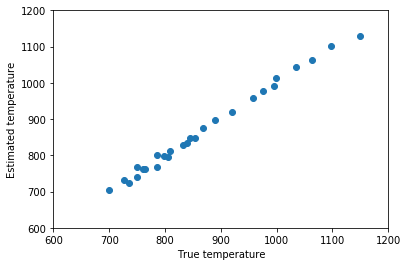

In [6]:


X=DAT.loc[DAT['Speed']==DAT['Speed'],['Speed','Feed','Hard']].values
y=DAT.loc[DAT['Speed']==DAT['Speed'],['TC1']].values


np.random.seed(1)

# randomly initialize our weights with mean 0
syn0 = 2*np.random.random((Neuron_input,Neuron_hidden)) - 1
syn1 = 2*np.random.random((Neuron_hidden,Neuron_output)) - 1


for j in range(Epoch):

    # Feed forward through layers 0, 1, and 2
    l0 = X
    l1 = sigmoid(np.dot(l0,syn0))
    l2 = purelin(np.dot(l1,syn1))

    # how much did we miss the target value?
    l2_error = y - l2

    if (j% 500) == 0:
        print("Epoch %d"%(j) +" error:" + str(np.mean(np.abs(l2_error))))

    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error*purelin(l2,deriv=True)
    l1_error = l2_delta.dot(syn1.T)
    l1_delta = l1_error * sigmoid(l1,deriv=True)

    syn1 += l1.T.dot(l2_delta)*Learning_rate
    syn0 += l0.T.dot(l1_delta)*Learning_rate

DAT=pd.read_csv(Arquivo,sep='\t')
y_obs=y_old
y_calc=np.reshape(l2,len(l2))
y_calc=pd.DataFrame({'y_calc':y_calc})
y_old=pd.DataFrame({'y_old':y_old})
y_calc=original(y_calc,y_old)


plt.scatter(y_obs,y_calc)
plt.xlabel("True temperature")
plt.ylabel("Estimated temperature")
plt.xlim((600,1200))
plt.ylim((600,1200))
plt.show()

In [7]:
print(l0)

[[0.         0.         0.        ]
 [0.         0.         0.5       ]
 [0.         0.         1.        ]
 [0.         0.5        0.        ]
 [0.         0.5        0.5       ]
 [0.         0.5        1.        ]
 [0.         1.         0.        ]
 [0.         1.         0.5       ]
 [0.         1.         1.        ]
 [0.40350877 0.         0.        ]
 [0.40350877 0.         0.5       ]
 [0.40350877 0.         1.        ]
 [0.40350877 0.5        0.        ]
 [0.40350877 0.5        0.5       ]
 [0.40350877 0.5        1.        ]
 [0.40350877 1.         0.        ]
 [0.40350877 1.         0.5       ]
 [0.40350877 1.         1.        ]
 [1.         0.         0.        ]
 [1.         0.         0.5       ]
 [1.         0.         1.        ]
 [1.         0.5        0.        ]
 [1.         0.5        0.5       ]
 [1.         0.5        1.        ]
 [1.         1.         0.        ]
 [1.         1.         0.5       ]
 [1.         1.         1.        ]]


In [8]:
print(l1)

[[0.5        0.5        0.5        0.5        0.5        0.5
  0.5        0.5        0.5        0.5        0.5        0.5
  0.5        0.5        0.5       ]
 [0.39507828 0.55856611 0.65760583 0.47993735 0.49353164 0.43430361
  0.59778122 0.56139917 0.36501921 0.56320387 0.84307364 0.6079014
  0.45980501 0.57778943 0.31386088]
 [0.29900713 0.61554693 0.7867233  0.45993919 0.48706545 0.3708371
  0.68835873 0.62097412 0.24837656 0.62441964 0.96651358 0.7061999
  0.42012621 0.65190211 0.17303606]
 [0.52431033 0.50941196 0.52136159 0.44924917 0.4674794  0.53699753
  0.56117846 0.44678841 0.53364034 0.55017646 0.53280508 0.41237924
  0.45975336 0.44033866 0.58659344]
 [0.41855768 0.56782852 0.67658932 0.42947376 0.46104382 0.47101938
  0.65524492 0.508296   0.39678483 0.61196007 0.85968628 0.52107775
  0.42007555 0.518471   0.39359393]
 [0.3197954  0.62441766 0.80071747 0.40992093 0.4546212  0.40603857
  0.73854185 0.56955346 0.27437759 0.67034236 0.97051555 0.62781637
  0.38140455 0.595710

In [9]:
print(l2)

[[0.00667795]
 [0.05333352]
 [0.48605846]
 [0.07297808]
 [0.13818066]
 [0.57253568]
 [0.13675293]
 [0.2185441 ]
 [0.64584548]
 [0.08830623]
 [0.15181976]
 [0.61566706]
 [0.15017451]
 [0.2262156 ]
 [0.69825533]
 [0.21463355]
 [0.29725779]
 [0.76313991]
 [0.24871576]
 [0.32802007]
 [0.80453656]
 [0.28665765]
 [0.38769241]
 [0.89106562]
 [0.32937654]
 [0.43891243]
 [0.9530685 ]]
